# Bike Sharing Assignment  : Multiple Linear Regression

##  Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## 1. Import Libraries

In [230]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from collections import defaultdictanory
from sklearn.preprocessing import LabelEncoder

#importing libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)

## 2. Reading and Understanding the Data

In [231]:
#Reading the day csv file
inp0 = pd.read_csv("day.csv")
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


####  Routine structure check / Inspecting the Dataframe

In [232]:
# Checking the number of rows and columns in the dataframe
inp0.shape

(730, 16)

In [233]:
# Check the column-wise info of the dataframe
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [234]:
# percentage of missing values in each column
round(100*(inp0.isnull().sum()/len(inp0.index)), 2).sort_values(ascending=False)


cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

Inference : There are NO MISSING/NULL values

#### Duplicate Check

In [235]:
# Create a dummy dataframe (copy of original inp0) for duplicate check
inp0_dup = inp0

# Checking for duplicates and dropping the entire duplicate row if any
inp0_dup.drop_duplicates(subset=None, inplace=True)

inp0_dup.shape

(730, 16)

#### Insights: - 
The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were NO DUPLICATE values in the dataset

In [236]:
# Check the summary for the numeric columns
inp0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Understanding data
The given dataset has 730 rows and 16 columns. Rest all, except ‘datetime’ are numerical columns.

The dataset shows  rental data for two years (2018 and 2019).  We are required to predict the total count of bikes rented 
with different independent featres.


##### Independent Variables

- instant: record index
- dteday : date in in "dd-mm-yyyy" format
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users

Both these columns(casual and registered) contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 


##### Dependent Variables

- cnt: count of total rental bikes including both casual and registered


## 3. Visualising the Data

Check, if there is some obvious multicollinearity going on, this is the first place to catch it.

Identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables
#### Exploring linear non-linear dependencies
Let's make a pairplot of all the numeric variables

<Figure size 1440x576 with 0 Axes>

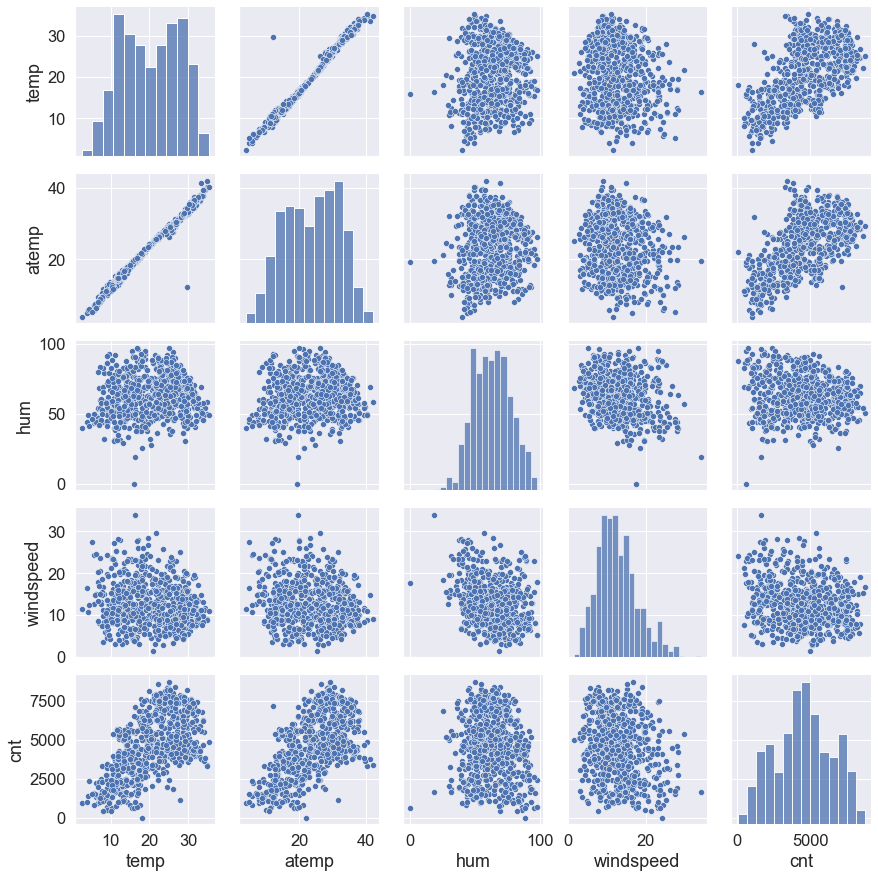

In [237]:
inp0_num=inp0[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.figure(figsize=(20,8)) 
sns.pairplot(inp0_num)
plt.show()

#### Insights : 
As it is apparent from the pair-plots above, some of the variables have linear dependencies with others while some don’t have a linear relationship.

We can see there seems to have a linear relationship between temp,atemp, and cnt.

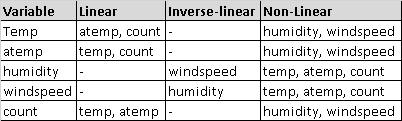

#### Visualising Categorical Variables
Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. - We will convert them to categorical

Before that Let's make a box-plot of all the seems to be  categorical variables

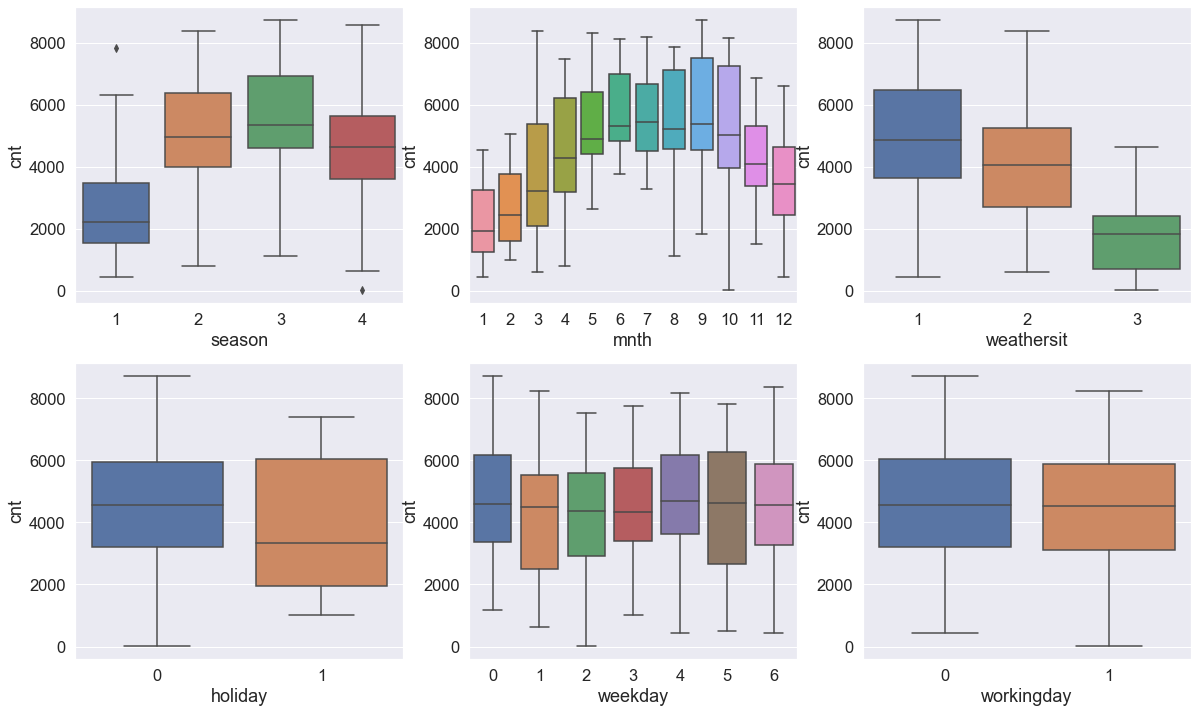

In [238]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = inp0)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = inp0)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = inp0)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = inp0)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = inp0)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = inp0)
plt.show()

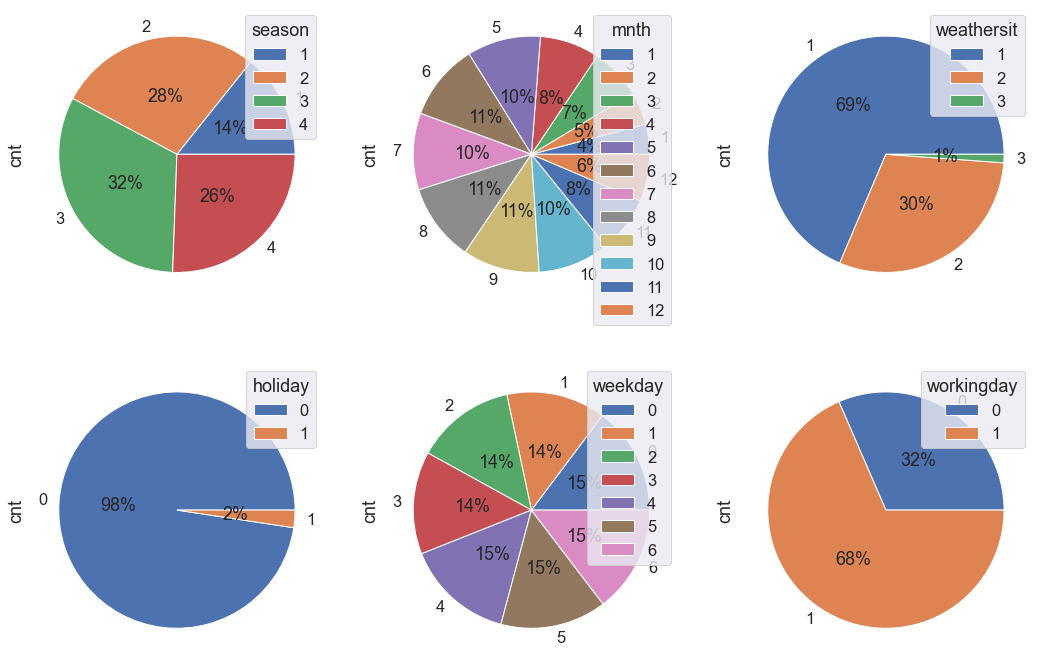

In [239]:
# Lets also plot pie-plot for more insights.

plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
inp0.groupby(["season"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='season', loc='upper right')
plt.subplot(2,3,2)
inp0.groupby(["mnth"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='mnth', loc='upper right')
plt.subplot(2,3,3)
inp0.groupby(["weathersit"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='weathersit', loc='upper right')
plt.subplot(2,3,4)
inp0.groupby(["holiday"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='holiday', loc='upper right')
plt.subplot(2,3,5)
inp0.groupby(["weekday"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='weekday', loc='upper right')
plt.subplot(2,3,6)
inp0.groupby(["workingday"])["cnt"].sum().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.legend(title='workingday', loc='upper right')
plt.show()

#### INSIGHTS : From the above box-plot and pie plot, we can see the below inference with respect to the dependent variable 'cnt'.


- season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 28% & 26% of total booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Almost 10% and 11% of the bike booking were happening in the months 5,6,7,8,9 &10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Almost 69% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- holiday: Almost 98% of the bike booking were happening when it is not a holiday. 

- weekday: weekday variable shows very close trend (between 14%-15% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

- workingday: Almost 68% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## 4. Data Preparation

##### Identifying  Categorical and Continious features.

-  Continious features in the dataset are 'temp', 'atemp', 'hum', 'windspeed','cnt'

-  While the rest features are categorical. 

-  Out of the categogical features 'yr', 'holiday', 'workingday' are binary columns and we do not need any preprocessing of these features and can directly consume in model.

We can see the dteday is categorical.
Lets Use ‘dteday’ column to get two more features ‘time’ and ‘month’.

In [240]:
# Pre processing  data
# Adding year and month to the dataframe using datatime column
        
year=[]
month=[]
day=[]

for i in inp0['dteday']:
    dt_object2 = datetime.strptime(i, "%d-%m-%Y")
    year.append(dt_object2.year)
    month.append(dt_object2.month)
    day.append(dt_object2.day)
inp0['year'] = pd.DataFrame(year)
inp0['year'] = inp0['year'].astype(int)
inp0['month'] = pd.DataFrame(month)
inp0['month'] = inp0['month'].astype(int)
print(inp0['year'])
        

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: year, Length: 730, dtype: int32


In [241]:
inp0.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [242]:
inp0.year.value_counts()

2019    365
2018    365
Name: year, dtype: int64

 #### Removing redundant & unwanted columns
- Since we already have seperate columns for 'yr' & 'month', and we can see dteday contains similar values. Hence, we could drop  this column 'dteday'
 
- Also the variable instant has only an index value, so we may drop this column as well.
 
- Casual and registered column as Both these columns(casual and registered) contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
 
 
 


#### Dropping unnecessary columns. Reason mentioned above.

In [243]:
# Dropping datetime column
inp0.drop('dteday',axis=1,inplace=True) 
inp0.drop('year',axis=1,inplace=True)
inp0.drop('month',axis=1,inplace=True)
# Dropping instant column as it is unique index values.
inp0.drop('instant',axis=1,inplace=True) 
# Dropping Casual and registered column as Both these columns(casual and registered) contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
inp0.drop('casual',axis=1,inplace=True)
inp0.drop('registered',axis=1,inplace=True)

In [244]:
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables / Encoding categorical variables

- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. - We will  convert them to categorical

- We will create Dummy variables for 4 categorical variables 'season','mnth', 'weekday',  & 'weathersit', which are in numeric type.

- Before creating dummy variables, we will have to convert them into 'category' data types and also replace the values with categorical meaningfull values given in the data dictionary ith respect to the features.

In [245]:
# Convert to 'category' data type

inp0['season']=inp0['season'].astype('category') 
inp0['mnth']=inp0['mnth'].astype('category')
inp0['weekday']=inp0['weekday'].astype('category')
inp0['weathersit']=inp0['weathersit'].astype('category')

In [246]:
inp0.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [247]:
# Replacing season (1:spring, 2:summer, 3:fall, 4:winter)
inp0.season.replace({1 : 'spring', 2 : 'summer', 3 :  'fall', 4 : 'winter'}, inplace=True)
inp0.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [248]:
# Replacing mnth (1:Jan - 12: Dec)
inp0.mnth.replace({1 : 'Jan', 2 : 'Feb', 3 :  'Mar', 4 : 'Apr',5 : 'May', 6 : 'Jun', 7 :  'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 :  'Nov', 12 : 'Dec'}, inplace=True)
inp0.mnth.value_counts()

Oct    62
Dec    62
Jan    62
Jul    62
Mar    62
Aug    62
May    62
Sep    60
Apr    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [249]:
# Replacing weekday (0:Sun - 6: Sat)
inp0.weekday.replace({0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 :  'Wed', 4 : 'Thu',5 : 'Fri', 6 : 'Sat'}, inplace=True)
inp0.weekday.value_counts()


Mon    105
Tue    105
Sun    104
Thu    104
Sat    104
Wed    104
Fri    104
Name: weekday, dtype: int64

In [250]:
# Replacing weathersit (0:Sun - 6: Sat)
inp0.weathersit.replace({ 1 : 'Clear', 2 : 'Mist + Cloudy', 3 :  'Light Snow + Light Rain', 4 : 'Heavy Rain + Ice Pallets'}, inplace=True)
inp0.weathersit.value_counts()

Clear                      463
Mist + Cloudy              246
Light Snow + Light Rain     21
Name: weathersit, dtype: int64

In [251]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 94.1+ KB


In [252]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

inp0_new = pd.get_dummies(inp0, drop_first=True)
inp0_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   atemp                               730 non-null    float64
 5   hum                                 730 non-null    float64
 6   windspeed                           730 non-null    float64
 7   cnt                                 730 non-null    int64  
 8   season_spring                       730 non-null    uint8  
 9   season_summer                       730 non-null    uint8  
 10  season_winter                       730 non-null    uint8  
 11  mnth_Aug                            730 non-n

## 5. Splitting the Data into Training and Testing Sets

In [253]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(inp0_new, train_size = 0.7, random_state = 333)

In [254]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
502,1,0,0,23.130847,27.55605,52.3333,9.166739,7639,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


#### Verify the two split dataframe info and shape

In [255]:
df_train.shape

(510, 30)

In [256]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 650 to 419
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  510 non-null    int64  
 1   holiday                             510 non-null    int64  
 2   workingday                          510 non-null    int64  
 3   temp                                510 non-null    float64
 4   atemp                               510 non-null    float64
 5   hum                                 510 non-null    float64
 6   windspeed                           510 non-null    float64
 7   cnt                                 510 non-null    int64  
 8   season_spring                       510 non-null    uint8  
 9   season_summer                       510 non-null    uint8  
 10  season_winter                       510 non-null    uint8  
 11  mnth_Aug                            510 non

In [257]:
df_test.shape

(220, 30)

In [258]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  220 non-null    int64  
 1   holiday                             220 non-null    int64  
 2   workingday                          220 non-null    int64  
 3   temp                                220 non-null    float64
 4   atemp                               220 non-null    float64
 5   hum                                 220 non-null    float64
 6   windspeed                           220 non-null    float64
 7   cnt                                 220 non-null    int64  
 8   season_spring                       220 non-null    uint8  
 9   season_summer                       220 non-null    uint8  
 10  season_winter                       220 non-null    uint8  
 11  mnth_Aug                            220 non-

#### Rescaling the Features

In [259]:
from sklearn.preprocessing import MinMaxScaler

In [260]:
scaler = MinMaxScaler()

In [261]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
502,1,0,0,23.130847,27.55605,52.3333,9.166739,7639,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [262]:
# Apply scaler() to all the numeric columns except the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [263]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [264]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.514508,0.250980,0.245098,0.241176,0.098039,0.076471,0.084314,0.084314,0.078431,0.072549,0.078431,0.092157,0.086275,0.084314,0.082353,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373,0.025490,0.343137
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.224150,0.434003,0.430568,0.428217,0.297660,0.266010,0.278131,0.278131,0.269113,0.259649,0.269113,0.289531,0.281045,0.278131,0.275172,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139,0.157763,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for positive/negative correlation & statisitical significance

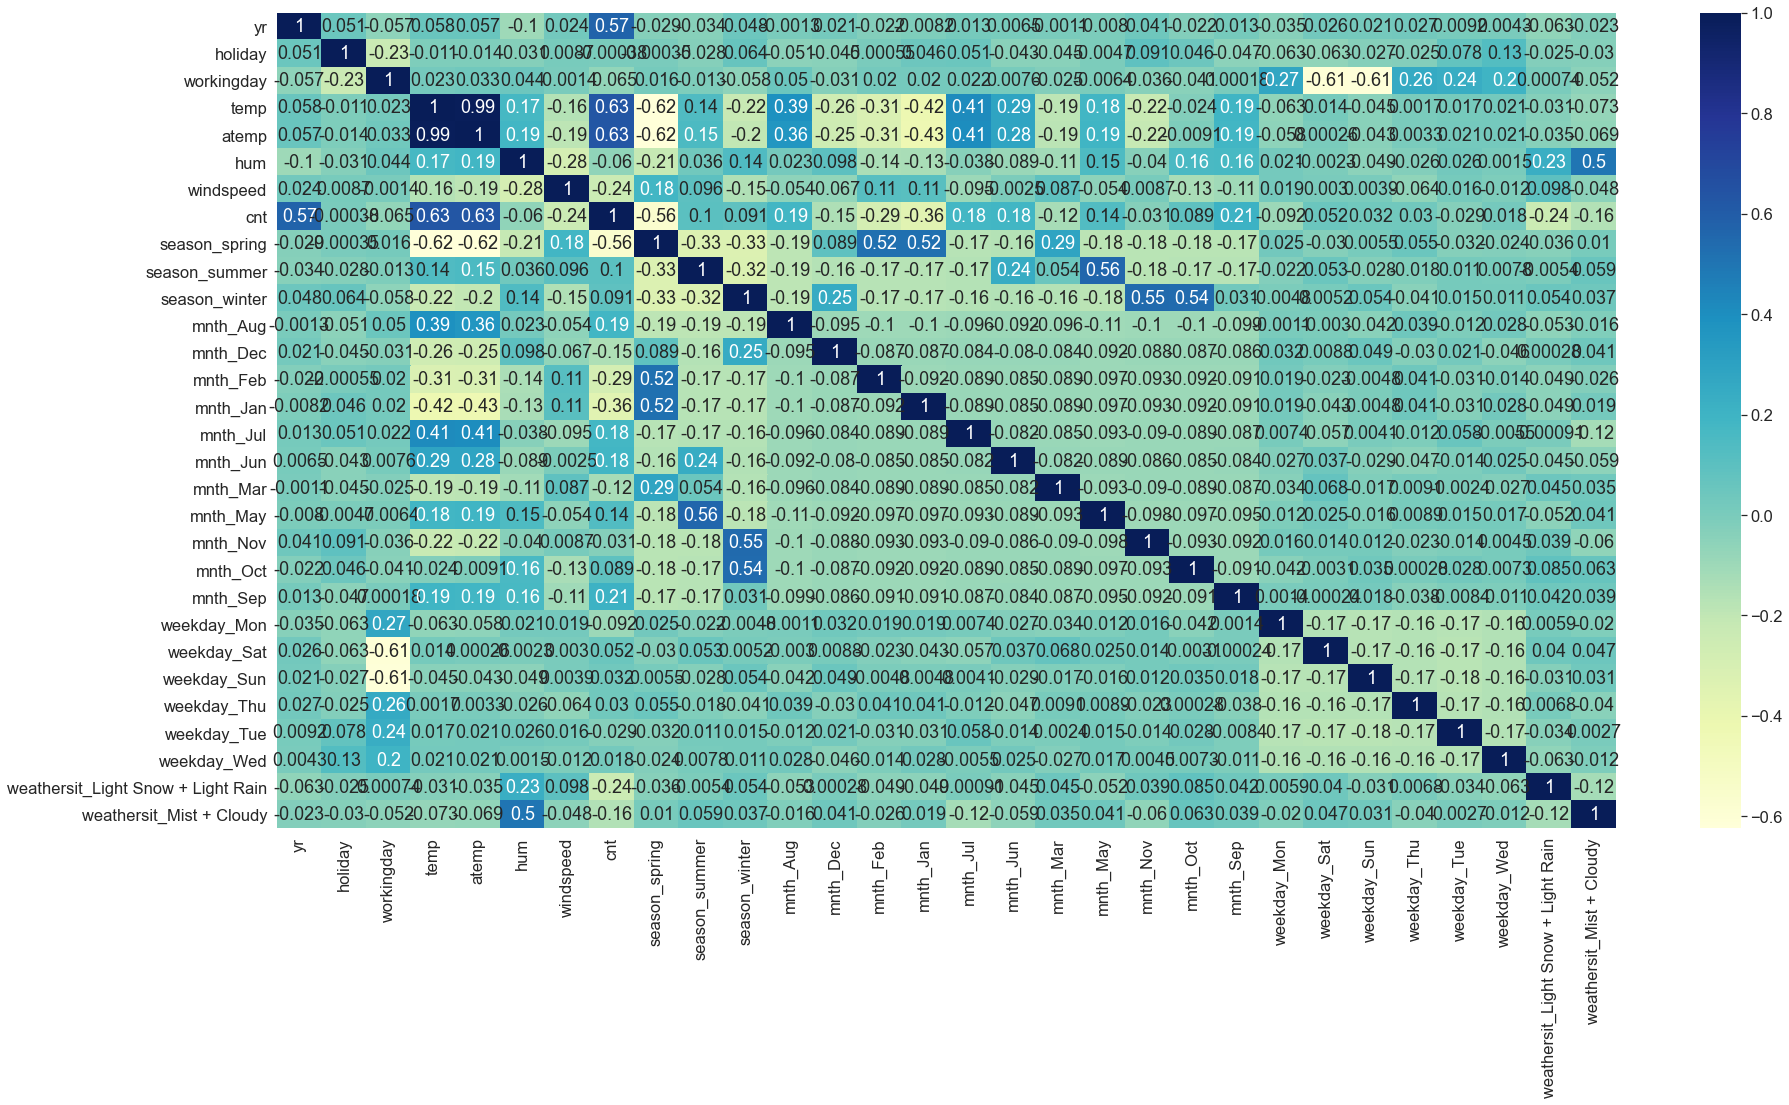

In [265]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insights:
The above heatmap shows which variable are multicollinear in nature.

Some with positive and some ith negative correlation, and which variable have high collinearity with the target variable.

And also few variables with -ve sign have a very low -ve value and can be safely ignored. 

- The Variable which has the highest correlation with the target variable 'cnt' are temp and atemp.
- After that the next variable which is high correlated ith the target variable 'cnt' is yr.
- We can also see the the variable season-spring is hightly -vely correlated with the target variable 'cnt'. 

So, we will refer this map  while building the linear model to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## 6. Building a linear model

We need to fit a regression line through the training data using statsmodels. We need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

###  Separate the features and target  by Dividing into X and Y sets for the model building

In [266]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

Recursive feature elimination : We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [267]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [268]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow + Light Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [269]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow + Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [270]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [271]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

### Model 1

In [272]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [273]:
lrm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [274]:
#Let's see the summary of our linear model 1
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.15e-183
Time:                        12:00:05   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [275]:
#  Calculate the VIFs for the Model 1

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,temp,357.78
2,atemp,354.14
3,hum,22.92
4,windspeed,5.12
6,season_winter,2.76
5,season_spring,2.69
14,weathersit_Mist + Cloudy,2.28
0,yr,2.05
10,mnth_Nov,1.83
8,mnth_Jul,1.42


### Model 2


Removing the variable 'atemp' based on its High p-value  

In [276]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [277]:
# Add a constant
X_train_lrm2 = sm.add_constant(X_train_new)

In [278]:
# Create a second fitted model
lrm2 = sm.OLS(y_train, X_train_lrm2).fit()

In [279]:
#Let's see the summary of our linear model 2
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.22e-184
Time:                        12:00:06   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [280]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.50
1,temp,15.96
3,windspeed,5.01
5,season_winter,2.73
4,season_spring,2.69
13,weathersit_Mist + Cloudy,2.27
0,yr,2.05
9,mnth_Nov,1.83
7,mnth_Jul,1.42
6,mnth_Dec,1.41


### Model 3

Removing the variable '"weekday_Sat' based on its High p-value

In [281]:
X_train_new = X_train_new.drop(["weekday_Sat"], axis = 1)

In [282]:
# Add a constant
X_train_lrm3 = sm.add_constant(X_train_new)

In [283]:
# Create a third fitted model
lrm3 = sm.OLS(y_train, X_train_lrm3).fit()

In [284]:
#Let's see the summary of our linear model 3
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.77e-185
Time:                        12:00:06   Log-Likelihood:                 499.70
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     496   BIC:                            -912.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [285]:

# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.49
1,temp,15.84
3,windspeed,5.00
5,season_winter,2.73
4,season_spring,2.69
12,weathersit_Mist + Cloudy,2.27
0,yr,2.05
9,mnth_Nov,1.82
7,mnth_Jul,1.41
6,mnth_Dec,1.40


### Model 4

Removing the variable 'hum' based on its High VIF

In [286]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [287]:
# Add a constant
X_train_lrm4 = sm.add_constant(X_train_new)

In [288]:
# Create a fourth fitted model
lrm4 = sm.OLS(y_train, X_train_lrm4).fit()

In [289]:
#Let's see the summary of our linear model 4
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.99e-182
Time:                        12:00:07   Log-Likelihood:                 489.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [290]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.97
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.90
8,mnth_Nov,1.80
11,weathersit_Mist + Cloudy,1.53
6,mnth_Jul,1.37
5,mnth_Dec,1.34
7,mnth_Mar,1.21


### Model 5

We can see the VIF of 'temp' variable is more than 5, but if we look at the coefficient values 'temp' variable is the most significant variable among the others and also from the heat map e can see that 'temp' has the highest correlation ith the target variable 'cnt'. So we will keep 'temp' and will remove the least significant variable 'mnth_Jul' from the model which has the least coefficient value and with high p value among the others.

In [291]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

In [292]:
# Add a constant
X_train_lrm5 = sm.add_constant(X_train_new)

In [293]:
# Create a fifth fitted model
lrm5 = sm.OLS(y_train, X_train_lrm5).fit()

In [294]:
#Let's see the summary of our linear model 5
print(lrm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.65e-181
Time:                        12:00:08   Log-Likelihood:                 486.36
No. Observations:                 510   AIC:                            -948.7
Df Residuals:                     498   BIC:                            -897.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [295]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.86
1,temp,4.16
4,season_winter,2.32
0,yr,2.04
3,season_spring,1.90
7,mnth_Nov,1.79
10,weathersit_Mist + Cloudy,1.51
5,mnth_Dec,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.18


#### Insights : 
The model looks good  as we can see  the very low collinearity between all the predictors and the p-values for all the predictors are low too.But we have to consider the Test data metrics and if it is significantly close to this then we can consider this as our final model.

## 7. Interpretation of Final Model 

In [296]:
# Check the parameters obtained

lrm5.params

const                                 0.282787
yr                                    0.233303
temp                                  0.394977
windspeed                            -0.147204
season_spring                        -0.130864
season_winter                         0.073713
mnth_Dec                             -0.051430
mnth_Mar                              0.055798
mnth_Nov                             -0.060958
mnth_Sep                              0.063387
weathersit_Light Snow + Light Rain   -0.314149
weathersit_Mist + Cloudy             -0.073621
dtype: float64

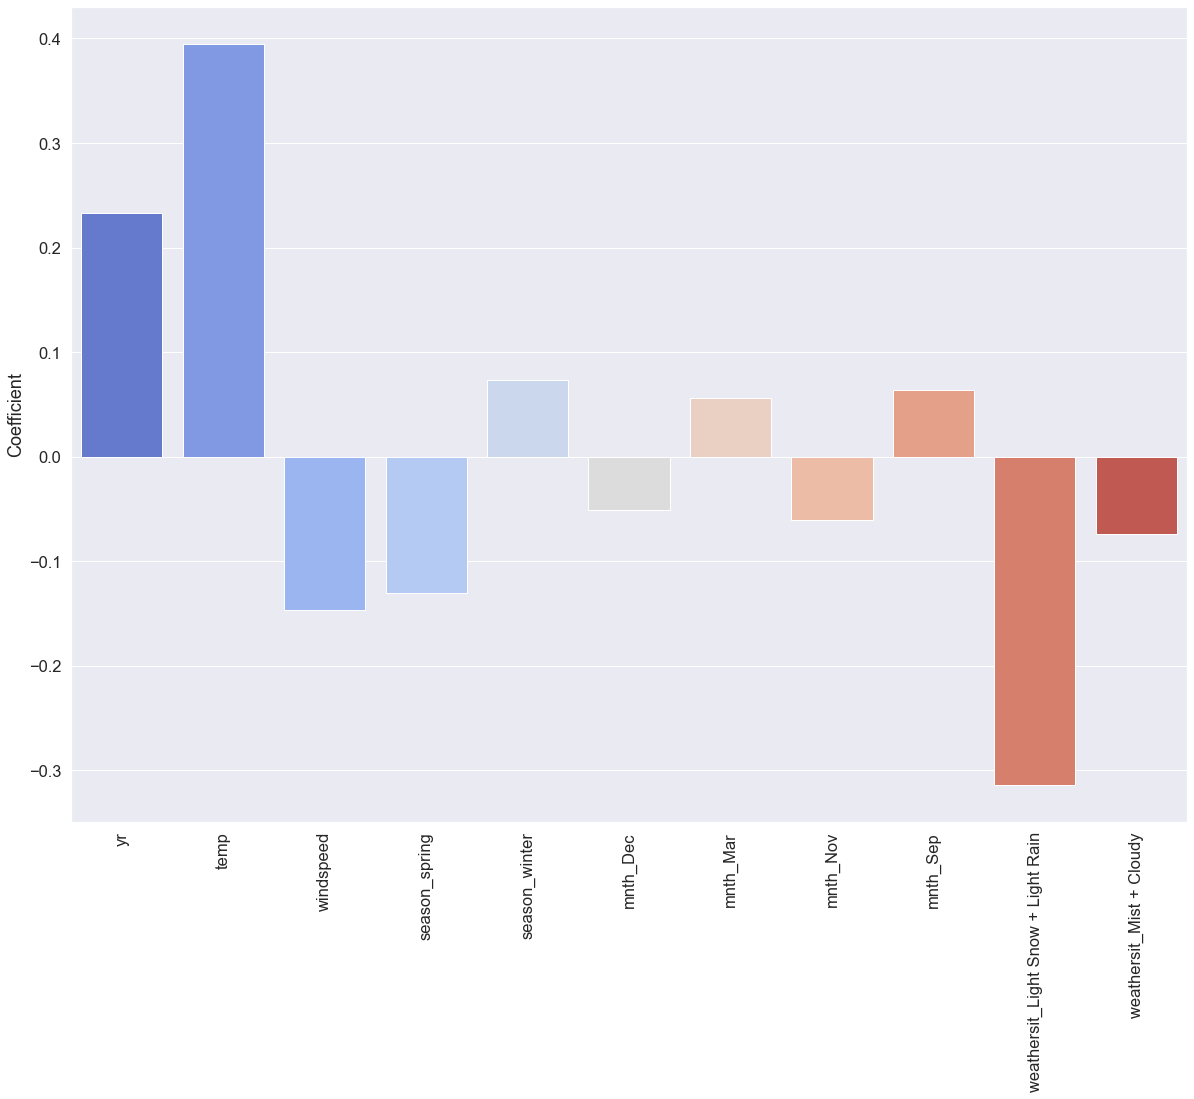

In [297]:
# Lets plot the model 6 that we created above with coefficient of the predictor variables 

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
coeff = pd.DataFrame(lrm5.params, index = X_train_new.columns, columns = ['Coefficient'])
sns.barplot(x = coeff.index, y = 'Coefficient', data = coeff, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

#### Insights:

As we can see from the coefficient values of the parameters of linear regression model 5 (lrm5) that none of them are zero, so we can say that the relationship between the variables are linear. 

And also the Constant value of 0.282787 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.282787 units.

#### Statistical significance

-  A p-value higher than 0.05 (> 0.05) is not statistically significant.
   Here the p-value approximately equals to 0.000 , which states that the model is significant.
   
-  A VIF less than 5 is acceptable and considered as moderate correlating. Our final model features contains VIF in the  acceptable range.
   
-  F-statistics  : F-Statistics is used for testing the overall significance of the Model. Higher the F-Statistics, more significant is the Model. 

Here the F-statistic:   215.9 and Prob (F-statistic):  1.65e-181
      
   Higher the  F-statistics better is the model. The F-Statistics value of 215.9 and the p-value of '~0.0000' states that the overall model is significant

### Assumptions 

#### a. Residual Analysis of the train data :  Error terms are normally distributed with mean zero 


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [298]:
y_train_pred = lrm5.predict(X_train_lrm5)

Text(0.5, 0, 'Errors')

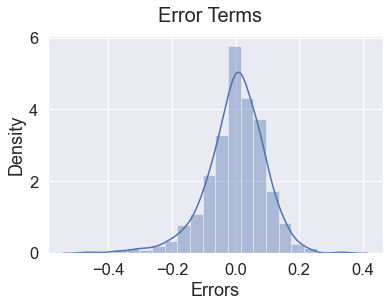

In [299]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        # X-label

#### Insights: 
From the above histogrm distribution plot, we can see that the Residuals are normally distributed with mean zero. Hence our assumption for Linear Regression is valid.

####  b. There is a linear relationship between X and Y

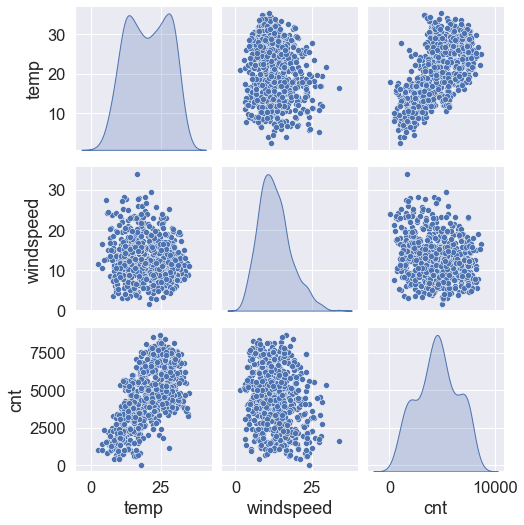

In [300]:
inp0_num=inp0_new[[ 'temp','windspeed','cnt']]

sns.pairplot(inp0_num, diag_kind='kde')
plt.show()

#### Insights: 
In the above pair plot, we could see there is a linear relation between temp variable ( from all the numeric variables from model 5, lrm5) with the predictor ‘cnt’.

#### c. There is No Multicollinearity between the predictor variables

In [301]:
# Check for the VIF values of the feature variables of Model 5 lrm5

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,windspeed,4.86
1,temp,4.16
4,season_winter,2.32
0,yr,2.04
3,season_spring,1.90
7,mnth_Nov,1.79
10,weathersit_Mist + Cloudy,1.51
5,mnth_Dec,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.18


#### Insights
From the VIF values we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## 8. Making Prediction using the Final Model 

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model lrm5.

#### Applying the scaling on the test sets

In [302]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [303]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [304]:
df_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.250980,0.245098,0.241176,0.098039,0.076471,0.084314,0.084314,0.078431,0.072549,0.078431,0.092157,0.086275,0.084314,0.082353,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373,0.025490,0.343137
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.434003,0.430568,0.428217,0.297660,0.266010,0.278131,0.278131,0.269113,0.259649,0.269113,0.289531,0.281045,0.278131,0.275172,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139,0.157763,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [305]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  220 non-null    int64  
 1   holiday                             220 non-null    int64  
 2   workingday                          220 non-null    int64  
 3   temp                                220 non-null    float64
 4   atemp                               220 non-null    float64
 5   hum                                 220 non-null    float64
 6   windspeed                           220 non-null    float64
 7   season_spring                       220 non-null    uint8  
 8   season_summer                       220 non-null    uint8  
 9   season_winter                       220 non-null    uint8  
 10  mnth_Aug                            220 non-null    uint8  
 11  mnth_Dec                            220 non-

In [306]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lrm = sm.add_constant(X_test)
X_test_lrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               220 non-null    float64
 1   yr                                  220 non-null    int64  
 2   temp                                220 non-null    float64
 3   windspeed                           220 non-null    float64
 4   season_spring                       220 non-null    uint8  
 5   season_winter                       220 non-null    uint8  
 6   mnth_Dec                            220 non-null    uint8  
 7   mnth_Mar                            220 non-null    uint8  
 8   mnth_Nov                            220 non-null    uint8  
 9   mnth_Sep                            220 non-null    uint8  
 10  weathersit_Light Snow + Light Rain  220 non-null    uint8  
 11  weathersit_Mist + Cloudy            220 non-

In [307]:
# Making predictions using the Fifth model lrm5

y_pred = lrm5.predict(X_test_lrm)

## 9. Model Evaluation

Text(0, 0.5, 'y_pred')

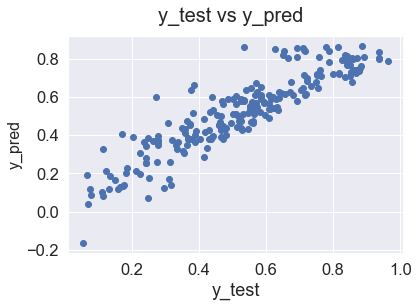

In [308]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### We can see that the equation of our best fitted line is:

    cnt = 0.282787 + (0.233303 × "yr")  + (0.394977 × "temp")  - (0.147204 ×  "windspeed") - (0.130864 ×  "season_spring") +(0.073713 ×  "season_winter") - (0.051430 × "mnth_Dec") + (0.055798 × "mnth_Mar") - (0.060958 × "mnth_Nov") + (0.063387 × "mnth_Sep")  - (0.314149 × "weathersit_Light Snow + Light Rain") - (0.073621  × "weathersit_Mist + Cloudy")    

#### Check the R^2 and Adusted R^2 for  Test data

In [309]:
# R^2 Value for Test data
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8170279432175165

In [310]:
# Adjusted R^2 Value for Test data

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.8073515363684428

#### Compare the R^2 and Adusted R^2 for both the Train and Test data

To be a good Model the R^2 and Adjusted R^2 for Train data need to be in the range of 0.82 to 0.89   and  the R^2 and Adjusted R^2 for Test data need to be in the range of 0.78 to 0.85

-     ##### Trainingset 
            R^2  = 0.827 and Train Adjusted R^2  = 0.823 

-     ##### Testingset 
            R^2 = 0.8170279432175165 and  Test Adjusted R^2 = 0.8073515363684428


##### This model 5 (lrm5) is a quite decent model.

### Final Model Report

- ##### Looking at our Final Model, we can see the top 3 predictors features that influence  the bike booking are:

    1. temp: The temp have a coefficient value of 0.394977, which  indicated that a unit increase in temp variable, increases the cnt(bike hire numbers) by 0.394977 units.
    2. weathersit ( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)   : The weathersit_Light Snow + Light Rain have a coefficient value of -0.314149 w.r.t weathersit, which  indicated that a unit increase in weathersit_Light Snow + Light Rain variable, decreases the cnt(bike hire numbers) by 0.314149 units.
    3. yr: The yr have a coefficient value of 0.233303, which  indicated that a unit increase in yr variable, increases the cnt(bike hire numbers) by 0.233303 units.
    
- ##### The other features that we can consider next are as mentioned:

    4. windspeed: The windspeed have a coefficient value of -0.147204, which  indicated that a unit increase in windspeed variable, decreases the cnt(bike hire numbers) by 0.147204 units
    5. season_spring: The season_spring have a coefficient value of -0.130864 w.r.t season, which  indicated that a unit increase in season_spring variable, decreases the cnt(bike hire numbers) by 0.13086 unit.
    6. season_winter: The season_winter have a coefficient value of 0.073713 w.r.t season, which  indicated that a unit increase in season_winter variable, increases the cnt(bike hire numbers) by 0.073713 units.
    7. weathersit_Mist + Cloudy:The weathersit_Mist + Cloudy have a coefficient value of -0.073621 w.r.r weathersit, which  indicated that a unit decrease in weathersit_Mist + Cloudy variable, decreases the cnt(bike hire numbers) by 0.073621 units.
    8. mnth_Sep: The mnth_Sep have a coefficient value of 0.063387 w.r.t mnth, which  indicated that a unit increase in mnth_Sep variable, increases the cnt(bike hire numbers) by 0.063387 unit
    9. mnth_Nov: The mnth_Nov have a coefficient value of -0.060958 w.r.t mnth, which  indicated that a unit increase in mnth_Nov variable, decreases the cnt(bike hire numbers) by 0.060958 unit
    10. mnth_Mar: The mnth_Mar have a coefficient value of 0.055798 w.r.t mnth, which  indicated that a unit increase in mnth_Mar variable, increases the cnt(bike hire numbers) by 0.055798 units.
    11. mnth_Dec: The mnth_Dec have a coefficient value of -0.051430 w.r.t mnth, which  indicated that a unit increase in mnth_Dec variable, decreases the cnt(bike hire numbers) by 0.051430 units.
    
    
##### By  considering these features as mentioned in order, planning can be done to achive maximum Booking for shared bikes.   
    
    
    
  
